# **Distribution or frequency distribution**
describes how a variable is distributed
- For example if we measured temperature in the same location in the UK location over a year we might expect 
  - most values to lie somewhere between say 5 and 25 degrees with perhaps an average of 15
  - there are occasional extremes going up to perhaps 32 or down to -2

- However, in other parts of the world (e.g. California) the spread is narrower
  - most values to lie somewhere between say 20 and 30 degrees with perhaps an average of 25
  - there are occasional extremes going up to perhaps 35 or down to 15


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("https://tinyurl.com/ChrisCoDV/Products/DailySales.csv", index_col=0)
pd.plotting.register_matplotlib_converters()
data.index = pd.to_datetime(data.index)
data.head()

,A,B,C,D,E,F,G,H,I,J,...,P,Q,R,S,T,U,V,W,X,Y
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,526,3,9,0,66,472,260,116,45,202,...,85,38,0,97,19,7,0,174,55,12
2019-01-02,504,11,10,0,57,472,157,108,3,223,...,73,0,0,92,45,0,14,132,65,8
2019-01-03,499,0,10,0,42,475,154,104,0,199,...,65,20,5,84,89,0,4,132,39,6
2019-01-04,504,0,7,0,57,464,149,83,17,198,...,83,19,0,89,0,0,14,143,57,20
2019-01-05,499,15,9,0,31,466,159,84,14,219,...,97,31,0,104,0,8,28,46,44,15


## Deviation / Outliers

Statistics has a way of describing the spread of values called the **`standard deviation`**
 - for the UK, the standard deviation would be something like 5 and for California it would be closer to 2.5
Assuming the data is **`normally`** distributed …
    - as it often is, although normal is actually a technical term with very specific meaning
- … then 68% of all measurements will be within 1 standard deviation of the mean and 95% will be within 2 standard deviations
    - so for the UK, the mean is 15 and if the standard deviation is 5 then 95% of all measurements are within the 5 to 25 range (= 15 ± 2 x 5)
    - for California, the mean is 25 and if the standard deviation is 2.5 then 95% of all measurements are within the 20 to 30 range (= 25 ± 2 x 2.5) 
- Very extreme values are known as **`outliers`**
    - no standard statistical definition but matplotlib describes how it calculates them at https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html
There are two standard ways of visualising distributions, deviations and outliers, each with their own advantages: **`histograms`** and **`box plots`**

## Histogram
- Histograms show frequencies that values appear using a set of bins
    - each bin represents a range of values, e.g. 20 to 22, 22 to 24, 24 to 26, etc
    - the data is sorted and put in the appropriate bin (e.g. 23.7 is put in the 22 to 24 bin)
    - the number of values in each bin are counted up and visualised as a bar with height representing the number of values in the bin (which is why histograms are sometime confused with bar charts)
- If you have too few bins the visualisation is pointless
    - e.g. if there a bin representing 0 to 30 almost all of the values will go in it
- On the other hand if you have too many bins the visualisation is also of limited use
    - e.g. if the bins are very narrow there might just a few values in each bin with several empty bins
- But there is no “correct” number of bins
you will need to experiment … between 10 and 50 is usually regarded as a suitable number

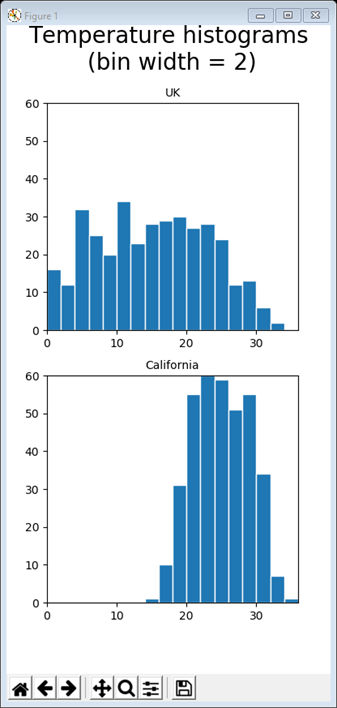

In [4]:
x_min = 0
x_max = 40
bin_width = 2

n_bins = int((bin_width + x_max - x_min) / bin_width)

print(str(n_bins) + " bins")
bins = [(x_min + x*int((bin_width + x_max - x_min)) / n_bins) for x in range(int(n_bins))]

21 bins


26 bins


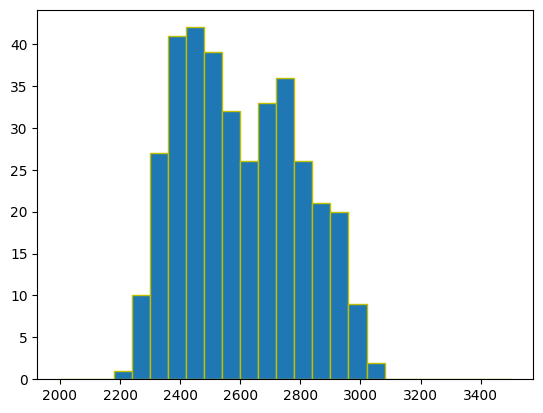

In [6]:
x_min = 2000
x_max = 3500
bin_width = 60

n_bins = int((bin_width + x_max - x_min) / bin_width)
print(str(n_bins) + ' bins')
bins = [(x_min + x * (bin_width + x_max - x_min) / n_bins) for x in range(int(n_bins))]

plt.hist(data.sum(axis=1), edgecolor="y", bins=bins)
plt.show()

## 02Histogram all subplots.py
- Using the same ideas as last week about creating subplots / facets, the following code plots the distributions for all 25 products
- Because they are so varied we let MatPlotLib decide on the bins

- The single line in bold actually creates the histogram
    - because MatPlotLib decides on the bin sizes the axes aren’t directly comparable
- Some distributions are very clearly normal (e.g. A, E, H, etc)
- Some are left skewed particularly by zero values (e.g. D, G, I, N)
    - the distribution for G clearly shows there are a lot of zeroes



In [7]:
index = 1
fig = plt.figure(figsize=(8,8))

fig.suptitle("Product sales distributions", fontsize=20, position=(.5, 1.0))

for name in data:
    print(data)

              A   B   C    D   E    F    G    H   I    J  ...   P   Q   R  \
Date                                                      ...               
2019-01-01  526   3   9    0  66  472  260  116  45  202  ...  85  38   0   
2019-01-02  504  11  10    0  57  472  157  108   3  223  ...  73   0   0   
2019-01-03  499   0  10    0  42  475  154  104   0  199  ...  65  20   5   
2019-01-04  504   0   7    0  57  464  149   83  17  198  ...  83  19   0   
2019-01-05  499  15   9    0  31  466  159   84  14  219  ...  97  31   0   
...         ...  ..  ..  ...  ..  ...  ...  ...  ..  ...  ...  ..  ..  ..   
2019-12-27  466   4   9  228  33  494  177  162  11  145  ...  96  27  16   
2019-12-28  456  13  12  219  23  497  155  166  44  163  ...  85  13  14   
2019-12-29  481  22   7  169  38  500  137  172  48  163  ...  69  10  12   
2019-12-30  478  17   8  243  54  497  210  192   0  153  ...  66   6  14   
2019-12-31  468  24  11  168  55  501  151  203   6  161  ...  77  41  11   

<Figure size 800x800 with 0 Axes>